# Attention Visualization 
### Blink timing detection 

In [9]:
# import model
best_model = keras.models.load_model('./model/VIT_1')

In [10]:
sub_model = tf.keras.Model(best_model.input, best_model.layers[-8].output)

In [11]:
tes = []

for t in test_dataset:
    tes = t
    break

1/1 [==============================] - 0s 445ms/step
../HUST-LEBW2/test/blink/59/10/zuo/10.jpg
(32, 40, 256) (40,)


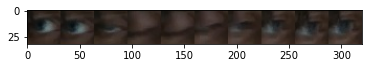

In [ ]:
res = sub_model.predict([ tes[0]] )
k = 8 # Image index

print(test_flist[k])
#print(res[0].shape, res[1][0][0][1].shape)

# multi head attention -> we used 2 heads
t = res[1][k][0, : , :].sum(axis=0).reshape(2, 2, 10) 
t2 = res[1][k][1, 0 , :].reshape(2, 2, 10)

plt.imshow(cv.cvtColor(cv.imread(test_flist[k]), cv.COLOR_RGB2BGR))å
#cv.imwrite(f't{k}.jpg',cv.imread(test_flist[k]),dpi=200)

(4, 10)


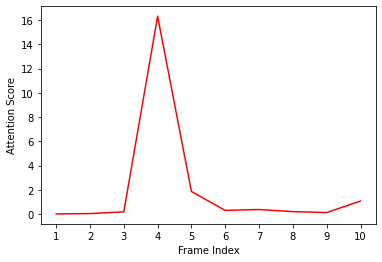

In [ ]:
plt.xlabel('Frame Index')
plt.ylabel('Attention Score')

t_ = t.reshape((-1, 10)).sum(axis=0)
t2_ = t2.reshape((-1, 10)).sum(axis=0)

print(t.reshape(-1, 10).shape)
avg = (t.reshape((-1, 10)).sum(axis=0) + t2.reshape((-1, 10)).sum(axis=0))/2 # sum of 2 heads' score

plt.plot(range(1, len(avg) + 1), avg, 'r')
plt.xticks(range(1,11), range(1,11))

plt.savefig(f't{k}_grap_200.png',dpi=200)